 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
#Set the file path
#I'm not sure why the path isn't working here, I have triple checked and I am still getting an error message
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", 
    infer_datetime_format=True, parse_dates=True)

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/1974750808.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(


In [3]:
# Read the individual CSV datasets
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", 
    infer_datetime_format=True, parse_dates=True)


/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/519135887.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(


In [4]:
#whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.
whale_returns = whale_returns.sort_index()
whale_returns.head()

whale_returns.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02  

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02  

In [7]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(
    algo_returns_csv, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
)
algo_returns = algo_returns.sort_index()
algo_returns.head()

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/2433148219.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(
    sp500_history_csv, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/2139755253.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history = pd.read_csv(
/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/2139755253.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv(


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [44]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat(
    [whale_returns, 
    algo_returns, 
    sp500_returns], 
    axis="columns", 
    join="inner"
)
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

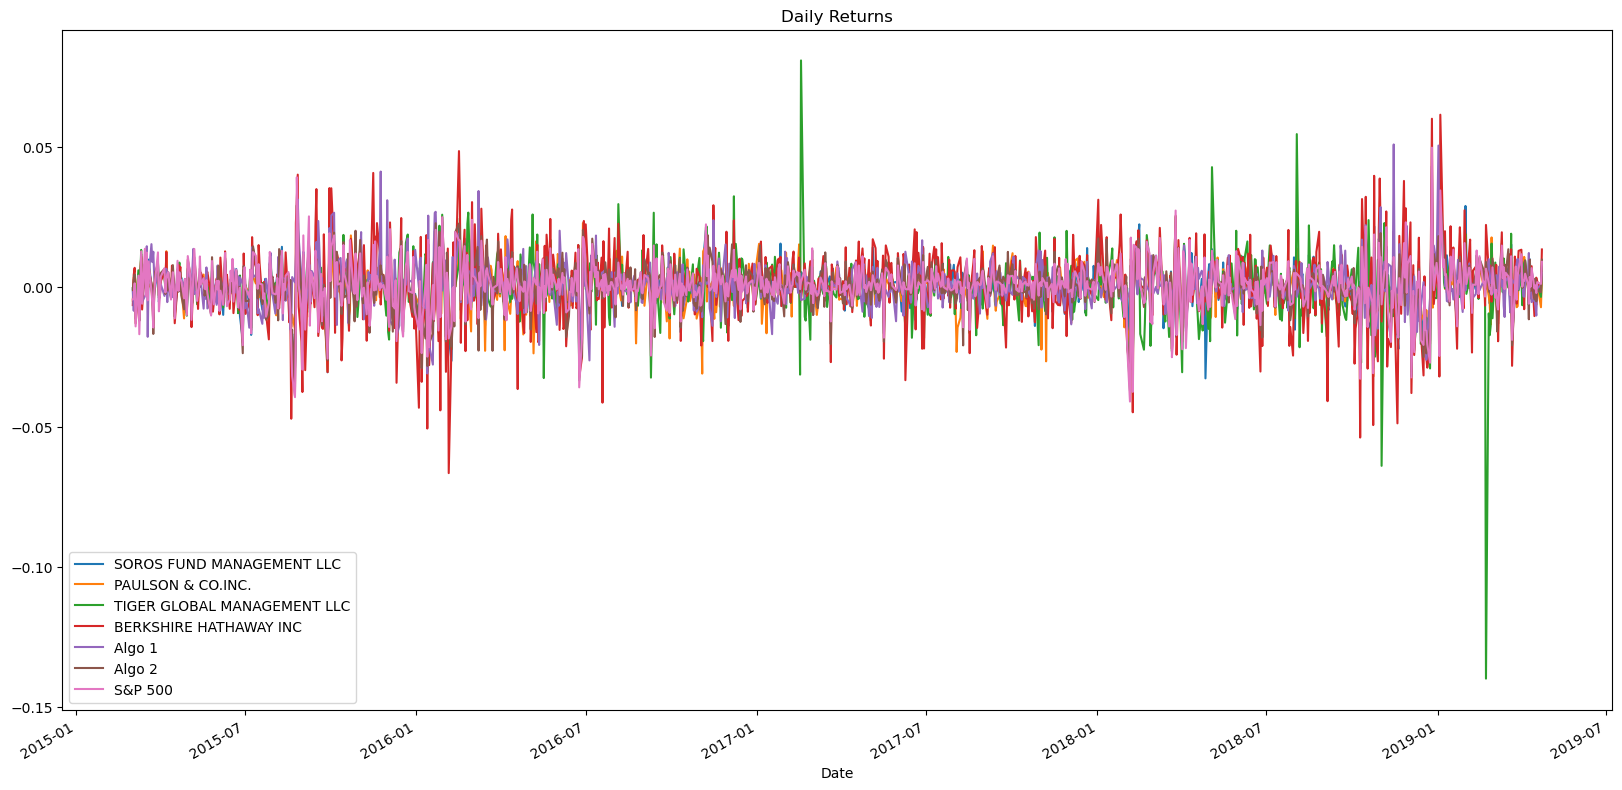

In [18]:
# Plot daily returns of all portfolios
all_portfolios.plot(
    figsize=(20, 10), 
    title="Daily Returns"
)

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

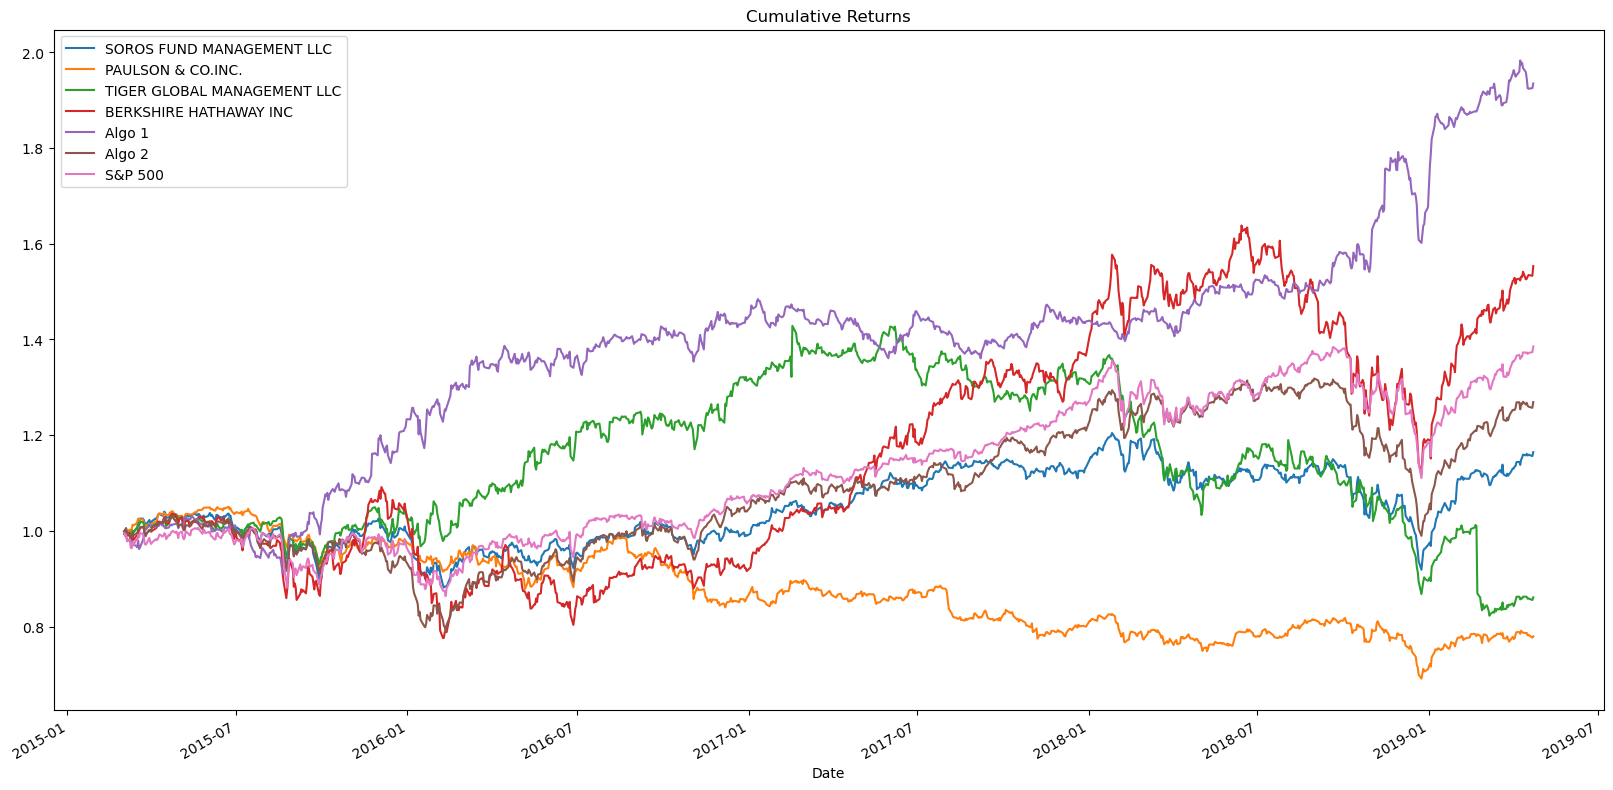

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(
    figsize=(20, 10), 
    title="Cumulative Returns"
)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolio Risk'}>

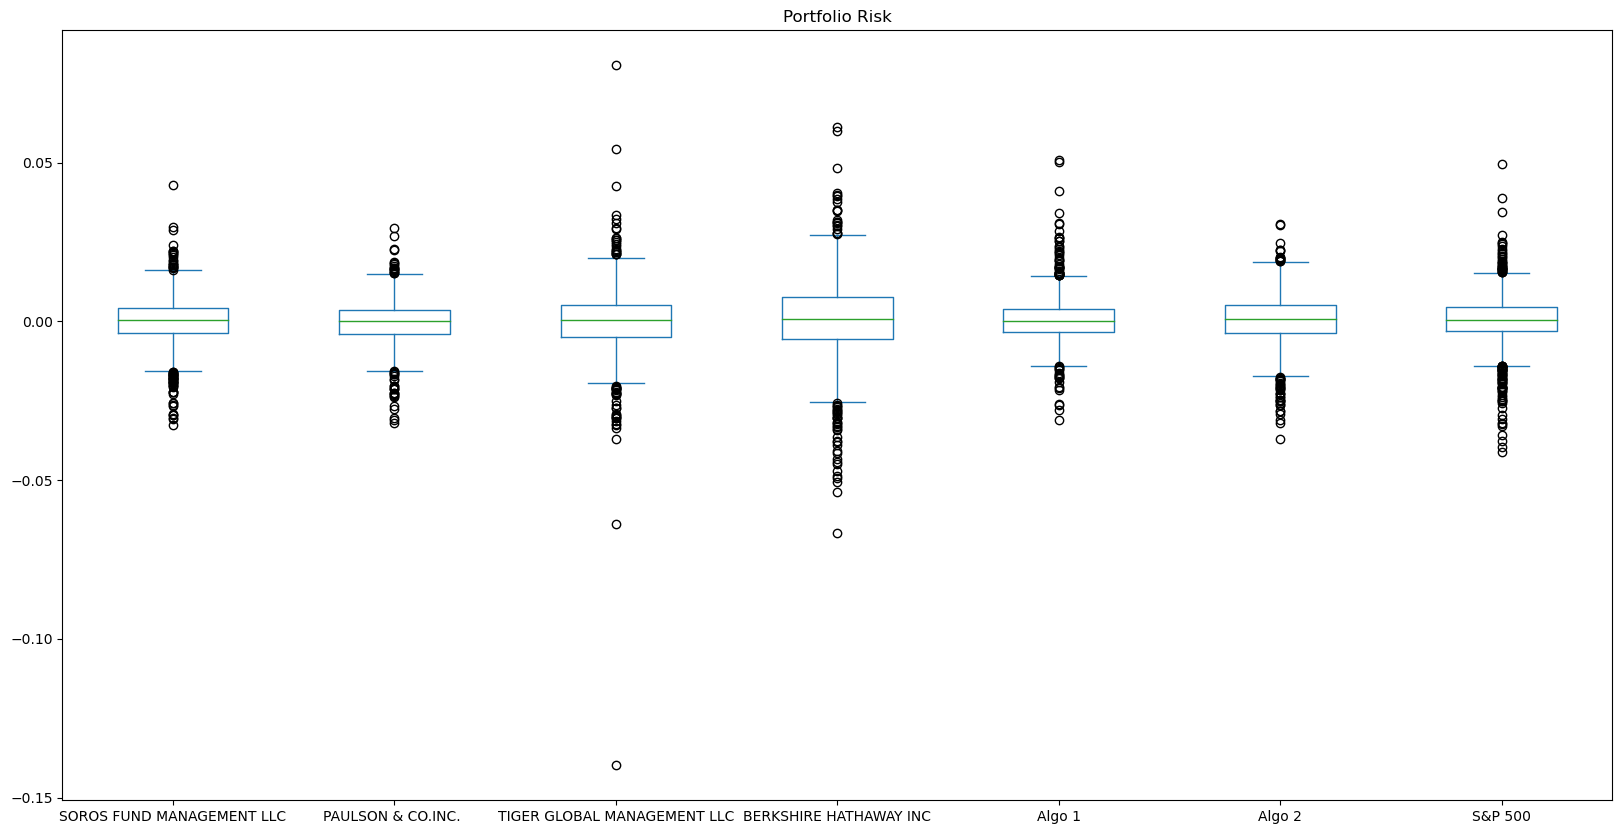

In [20]:
# Box plot to visually show risk
all_portfolios.plot.box(
    figsize=(20,10), 
    title="Portfolio Risk"
)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = all_portfolios["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
all_portfolios.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_portfolios.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Date'>

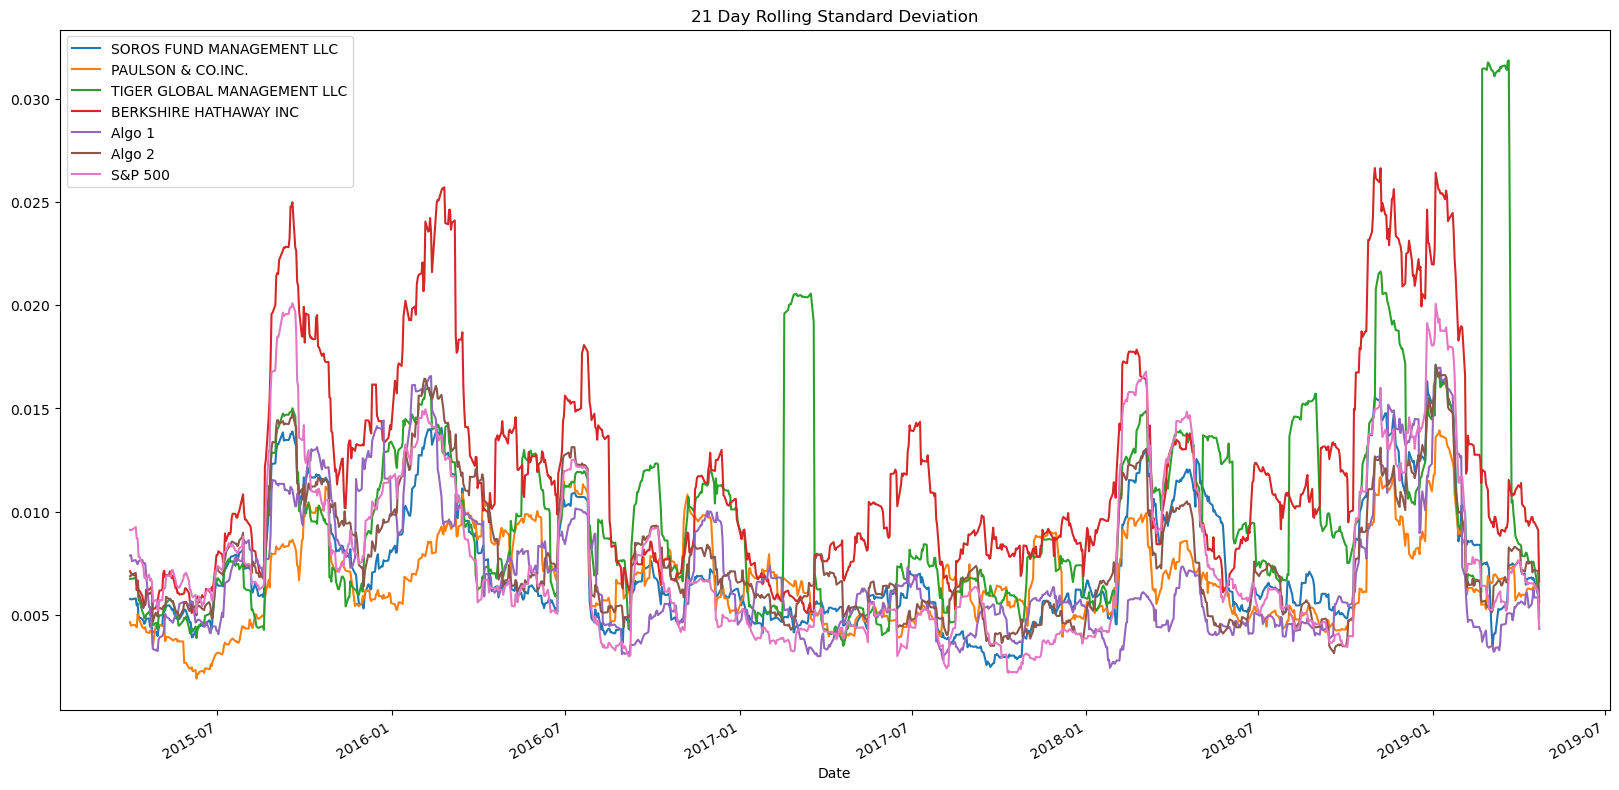

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(
    figsize=(20, 10), 
    title="21 Day Rolling Standard Deviation"
)

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
corr_df = all_portfolios.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

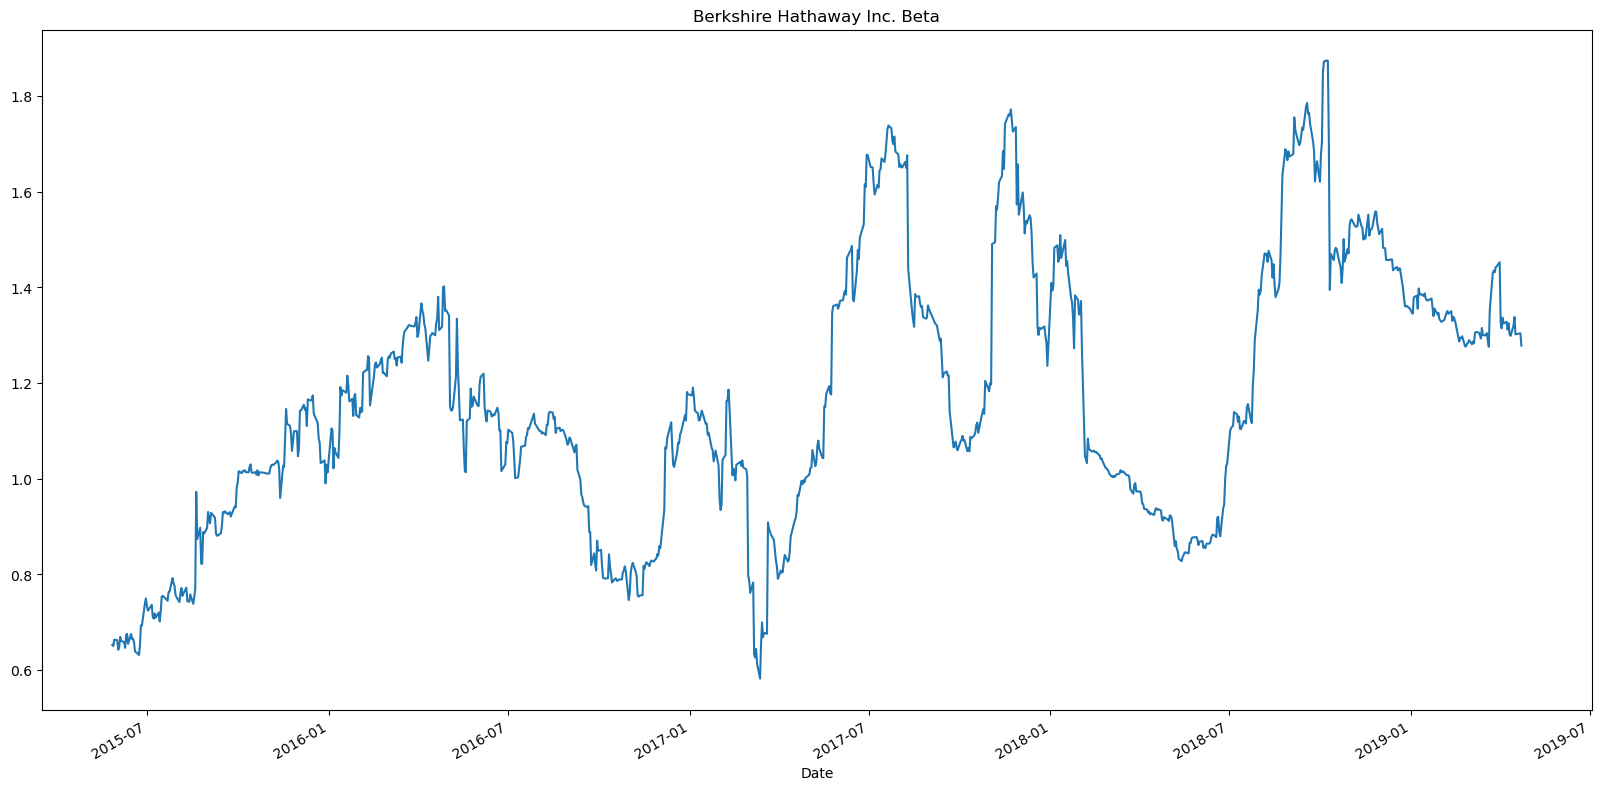

In [26]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios["S&P 500"])

# Calculate variance of S&P 500
variance = all_portfolios["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(
    figsize=(20, 10), 
    title="Berkshire Hathaway Inc. Beta"
)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

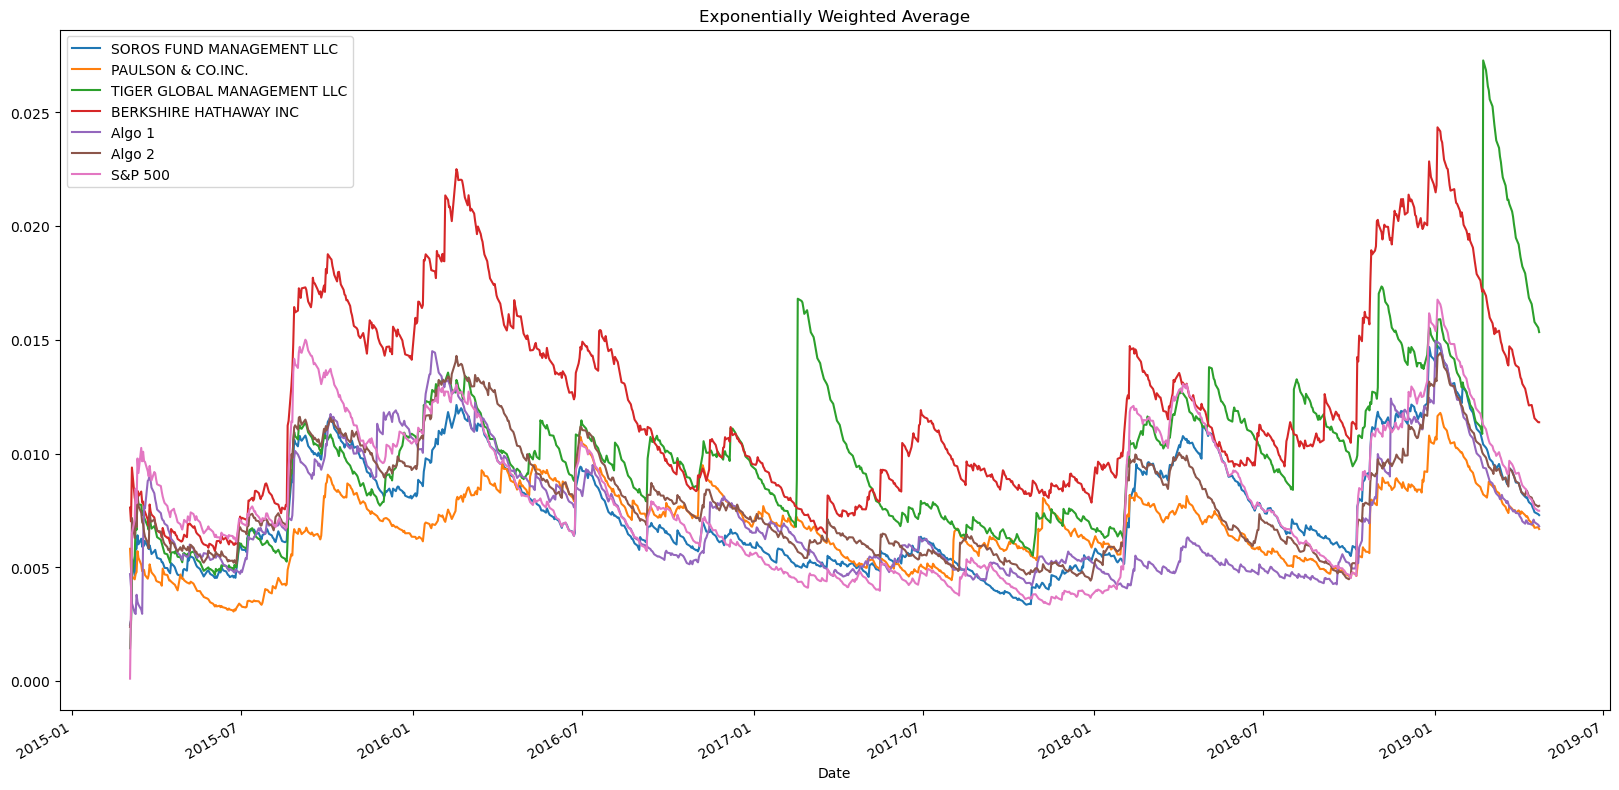

In [27]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

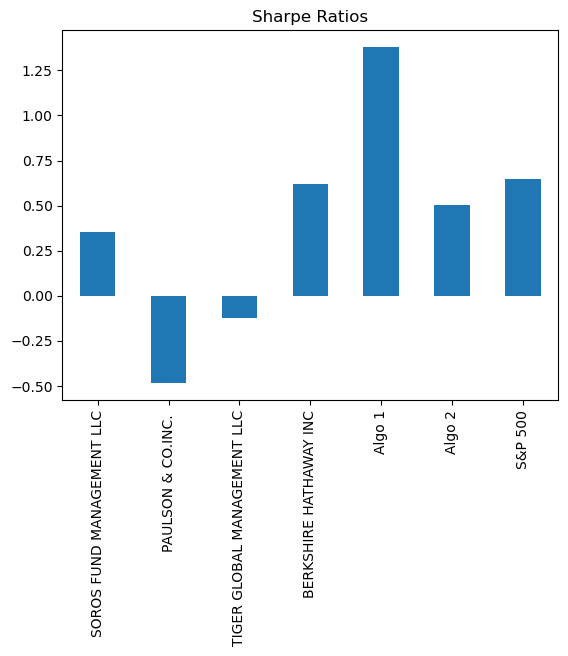

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
google_historical_csv = Path("Resources/goog_historical.csv")
google_historical = pd.read_csv(
    google_historical_csv, 
    index_col="Trade DATE", 
    infer_datetime_format=True, 
    parse_dates=True
)
google_historical = google_historical.sort_index()
google_historical.head()

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/2239743916.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google_historical = pd.read_csv(


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Reading data from 2nd stock
apple_historical_csv = Path("Resources/aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/3104640620.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple_historical = pd.read_csv(


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [32]:
# Reading data from 3rd stock
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv(
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

/var/folders/y1/gs_trwzd195f5bl9bb0dxstw0000gp/T/ipykernel_99688/3264072970.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  costco_historical = pd.read_csv(


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [51]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [34]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [35]:
# Reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Calculate daily returns
daily_returns = portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna().copy()

# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights).rename("Mine")

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: Mine, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame

combined_portfolios = pd.concat([portfolio_returns,all_portfolios], axis="columns", join="inner")

combined_portfolios.head()

,Mine,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [104]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#all_portfolios = all_portfolios.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
risk = combined_portfolios.std() * np.sqrt(252)
risk

Mine                           0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}>

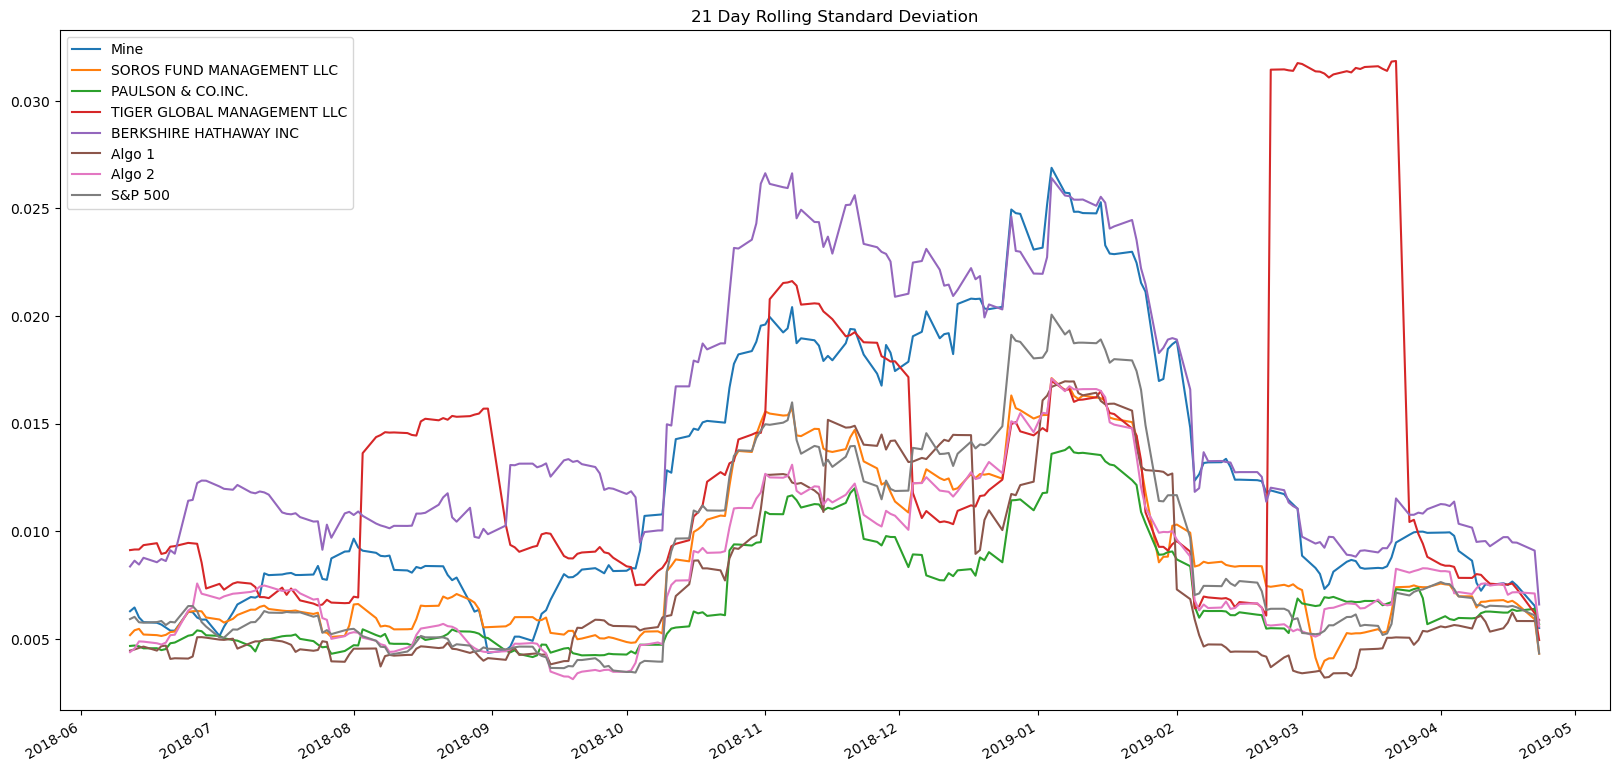

In [53]:
# Calculate rolling standard deviation
rolling_std_dev = combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_dev.plot(
    figsize=(20, 10), 
    title="21 Day Rolling Standard Deviation"
)

### Calculate and plot the correlation

In [54]:
# Calculate and plot the correlation
corr = combined_portfolios.corr()
corr
#df.style.background_gradient(cmap="bwr")

,Mine,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Mine,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Custom Portfolio Beta'}>

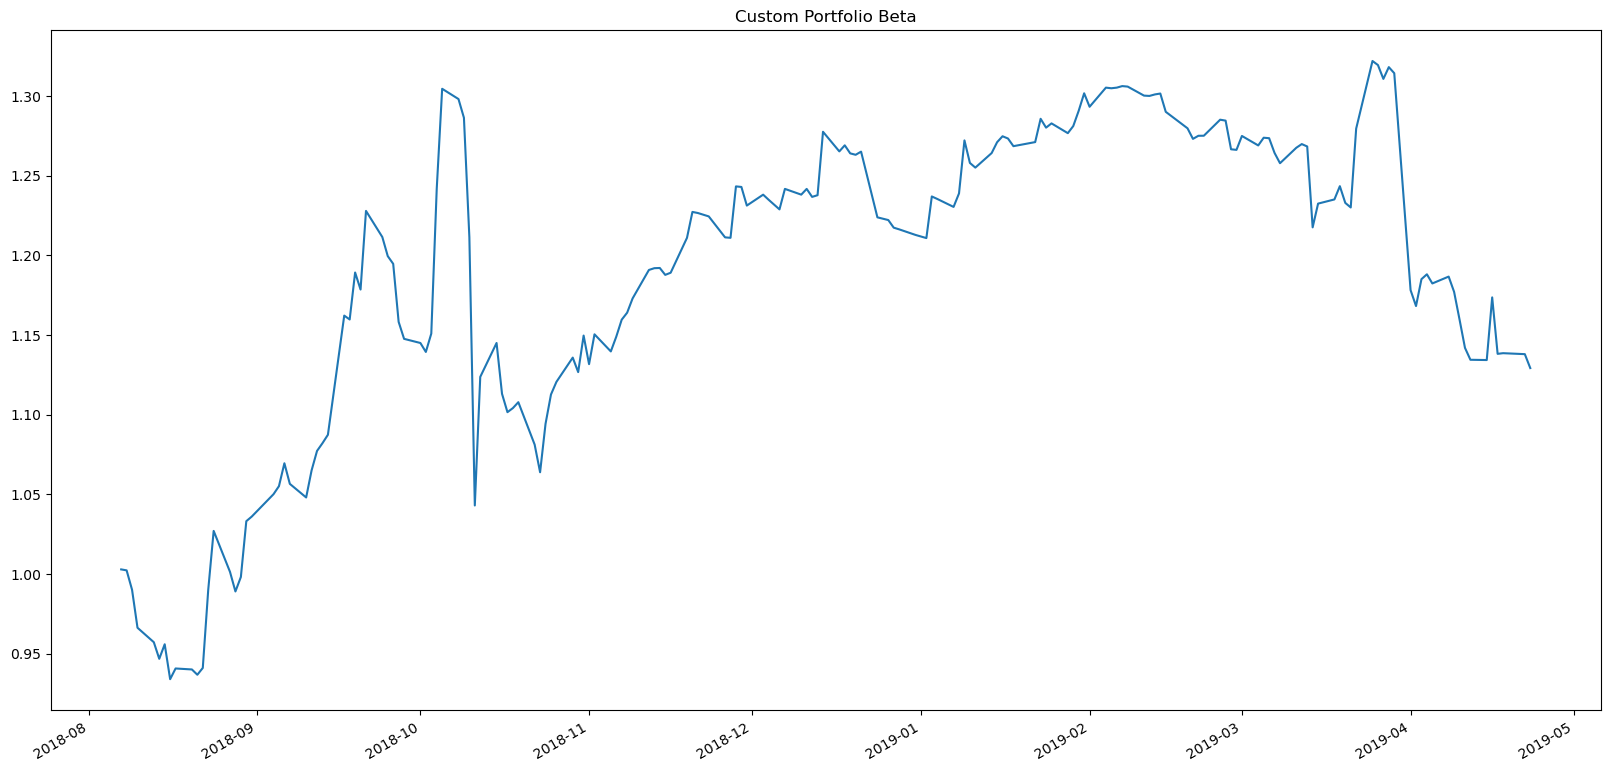

In [55]:
# Calculate and plot Beta
covariance = combined_portfolios["Mine"].rolling(window=60).cov(combined_portfolios["S&P 500"])
variance = combined_portfolios["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(
    figsize=(20, 10), 
    title="Custom Portfolio Beta"
)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios.mean() *252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios

Mine                           0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

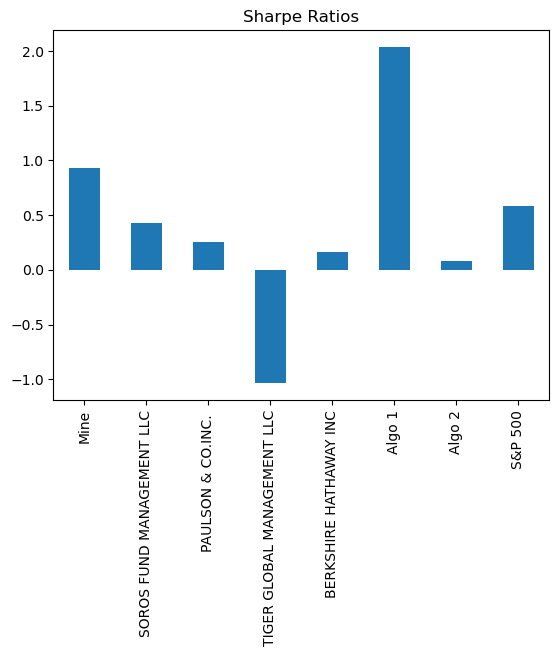

In [57]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!